<a href="https://colab.research.google.com/github/FachaV/Klein-Gordon/blob/main/Ejercicio_1_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Ec. Dinámica para winding number n=0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



Valor de f(0): 1.0


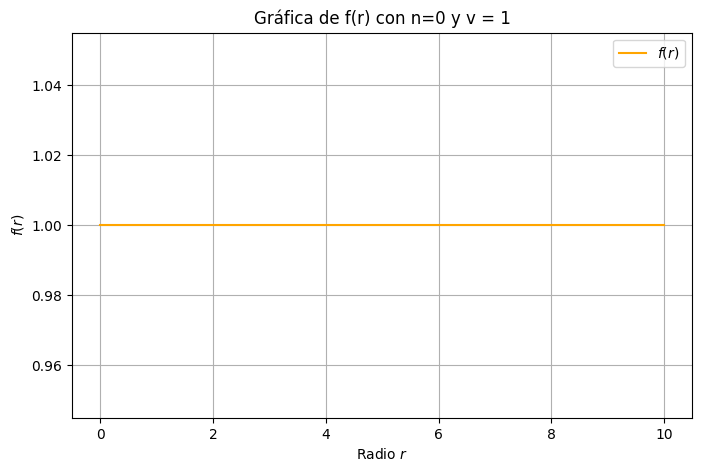

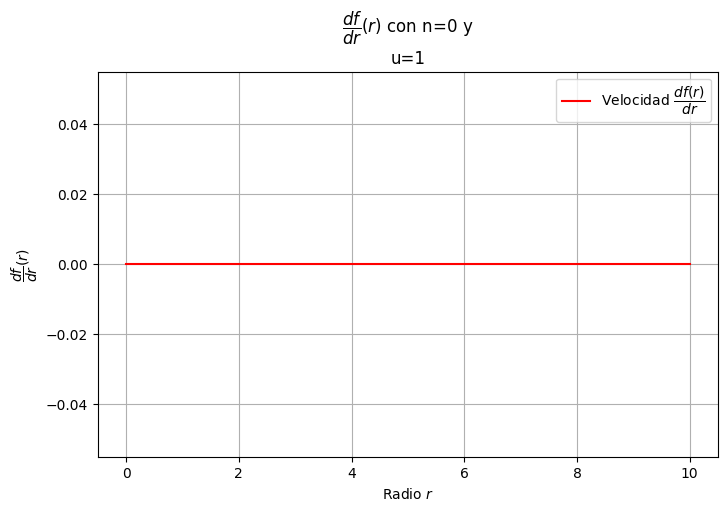

In [6]:
import numpy as np
import matplotlib.pyplot as plt


nu = 1
l = 1

# Definimos el sistema de ecuaciones diferenciales de primer orden
def sistema(r, y):
    f, v = y
    if r == 0:
        dfdr = 0
        dvdr = 0
    else:
        dfdr = v
        dvdr = -v / r + l * (f**2 - nu**2) * f
    return np.array([dfdr, dvdr])

# Implementación del método de Runge-Kutta
def runge_kutta(func, y0, inicio, fin, num_puntos):
    h = (fin - inicio) / (num_puntos - 1)
    x = np.linspace(inicio, fin, num_puntos)
    ysol = np.zeros((num_puntos, len(y0)))
    ysol[0, :] = y0

    for i in range(1, num_puntos):
        k1 = h * func(x[i-1], ysol[i-1, :])
        k2 = h * func(x[i-1] + h/2, ysol[i-1, :] + k1/2)
        k3 = h * func(x[i-1] + h/2, ysol[i-1, :] + k2/2)
        k4 = h * func(x[i-1] + h, ysol[i-1, :] + k3)
        ysol[i, :] = ysol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, ysol

# Intervalo
a = 0
b = 10
npt = 500

# Método de shooting para determinar el valor inicial f(r=0)
def metodo_shoot(f_inf, f_sup, nu, a, b, tolerancia=1e-14):
    while True:
        h = (f_inf + f_sup) / 2
        y0 = [h, 0]
        r, solucion = runge_kutta(sistema, y0, a, b, npt)
        if abs(solucion[-1, 0] - nu) < tolerancia:
            return h
        if solucion[-1, 0] < nu:
            f_inf = h
        else:
            f_sup = h
        if abs(f_sup - f_inf) < tolerancia:
            return h

f_inf = nu - 10
f_sup = nu + 10
h = metodo_shoot(f_inf, f_sup, nu, a, b)
print('Valor de f(0):', h)

r, resultado = runge_kutta(sistema, [h, 0], a, b, npt)
f = resultado[:, 0]
v = resultado[:, 1]

# Graficar f(r)
plt.figure(figsize=(8, 5))
plt.plot(r, f, color='orange', label='$f(r)$')
plt.title('Gráfica de f(r) con n=0 y v = 1')
plt.xlabel('Radio $r$')
plt.ylabel('$f(r)$')
plt.legend()
plt.grid()
plt.show()

# Graficar df/dr
plt.figure(figsize=(8, 5))
plt.plot(r, v, color='red', label='Velocidad $\dfrac{df(r)}{dr}$')
plt.title('$\dfrac{df}{dr}(r)$ con n=0 y \nu=1')
plt.xlabel('Radio $r$')
plt.ylabel('$\dfrac{df}{dr}(r)$')
plt.legend()
plt.grid()
plt.show()


# Densidad de energía para n=0

Recordando que la densidad de energía estará dada como
$$\rho = v^2+\frac{l}{2}(f^2-\nu^2)^2$$

La energia con n=0 es E=  0.0




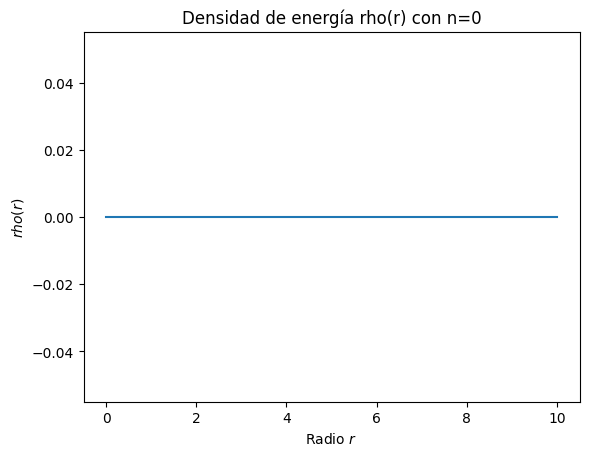

In [ ]:
#Definimos la densidad de energía
rho = v**2 + (l/2)*(f**2 - nu**2)**2

#Calulamos entonces la energía
E=np.trapz(rho,r)
print('La energia con n=0 es E= ',E)
print('\n')

#Gráfica de la densidad
plt.plot(r,rho)
plt.xlabel('Radio $r$')
plt.ylabel('$rho(r)$')
plt.title('Densidad de energía rho(r) con n=0')
plt.show()

## Ecuación dinámica para winding number n=1

<ipython-input-43-66b6d84de783>:12: RuntimeWarning: overflow encountered in scalar multiply
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
<ipython-input-43-66b6d84de783>:12: RuntimeWarning: overflow encountered in scalar power
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
<ipython-input-43-66b6d84de783>:12: RuntimeWarning: invalid value encountered in scalar add
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f


Valor de v(0):  0.5831843281890681


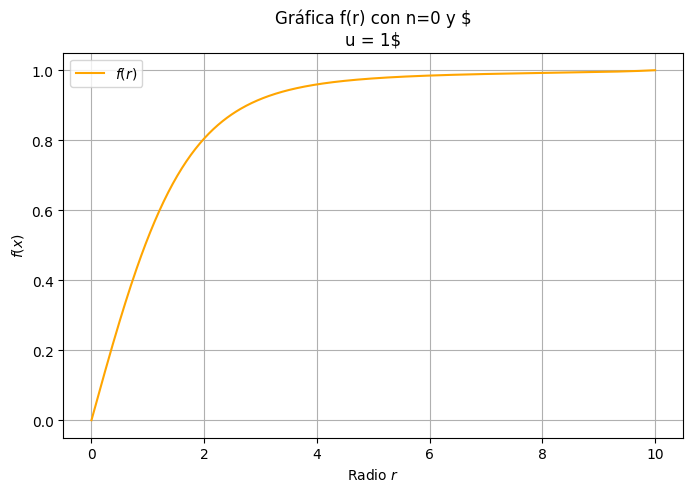

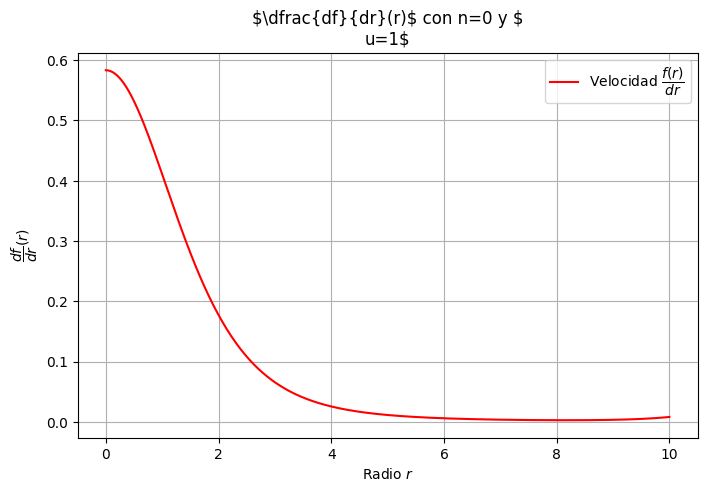

In [ ]:
#Definimos las constantes

nu=1
l=1

# Definimos el sistema de ecuaciones diferenciales de primer orden
def system(r,y):
  f, v = y
  if r==0:
    dfdr = v
    dvdr = 0
  else:
    dfdr = v
    dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f
  return np.array([dfdr, dvdr])

#Implementacion del método de Runge-Kutta
def runge_kutta(f, y0, a, b, npt):
  h = (b-a)/(npt-1)
  x = np.linspace(a, b, npt)
  ysol = np.zeros((npt, len(y0)))
  ysol[0,:] = y0

  for i in range(1, npt):
    k1 = h * f(x[i-1], ysol[i-1, :])
    k2 = h * f(x[i-1] + h/2, ysol[i-1, :] + k1/2)
    k3 = h * f(x[i-1] + h/2, ysol[i-1, :] + k2/2)
    k4 = h * f(x[i-1] + h, ysol[i-1, :] + k3)
    ysol[i, :] = ysol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

  return x, ysol

#Intervalo
a=0
b=10
npt=500

#Definimos las condiciones de frontera
f_a = 0      # r = a
f_b = nu     # r = b

def shoot1(v_m, v_M, nu, a, b, tol=1e-14):
  while True:
    v = (v_m + v_M)/2
    y0 = [f_a, v]
    r, ysol = runge_kutta(system, y0, a, b, npt)

    if abs(ysol[-1, 0] - nu) < tol:
      return v

    if ysol[-1, 0] < nu:
      v_m = v
    else:
      v_M = v

    if abs(v_M - v_m) < tol:
      return v

v_m=0
v_M=10
dfdr=0

v = shoot1(v_m, v_M, nu, a, b)
y0 = [f_a, v]
print('Valor de v(0): ', v)

r, sol = runge_kutta(system, y0, a, b, npt)
f = sol[:, 0]
v = sol[:, 1]

# Graficar
plt.figure(figsize=(8,5))
plt.plot(r, f, c='orange', label='$f(r)$')
#plt.plot(t, v, label='Velocidad $\dfrac{d\phi(x)}{dt}$', linestyle='dashed')
plt.title('Gráfica f(r) con n=0 y $\nu = 1$')
plt.xlabel('Radio $r$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

# Graficar
print('\n')
plt.figure(figsize=(8,5))
#plt.plot(t, x, label='Posición $\phi(x)$')
plt.plot(r, v, c='red', label='Velocidad $\dfrac{f(r)}{dr}$')
plt.title('$\dfrac{df}{dr}(r)$ con n=0 y $\nu=1$')
plt.xlabel('Radio $r$')
plt.ylabel('$\dfrac{df}{dr}(r)$')
plt.legend()
plt.grid()
plt.show()

# Densidad de energía para n=1

In [ ]:
#Definimos la densidad de energía
rho = v**2 + (l/2)*(f**2 - nu**2)**2

#Calulamos entonces la energía
E=np.trapz(rho,r)
  if ()
  print('La energia con n=0 es E= inf')
  print('\n')
  else ()


#Gráfica de la densidad
plt.plot(r,rho)
plt.xlabel('Radio $r$')
plt.ylabel('$rho(r)$')
plt.title('Densidad de energía rho(r) con n=0')
plt.show()

# Ecuación dinámica para winding number n=2

In [ ]:
Work progress

# Densidad de energía para n=2